In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Данные о заработной плате учителей и расходах на учащегося
salary_spending_data = {
    "Salary": [19583, 20263, 20325, 26800, 29470, 26610, 30678, 27170, 25853, 24500, 24274, 27170, 26525, 27392, 21960, 21974, 20816, 18095, 20939, 24624, 22642, 24264, 23382, 23392, 20627, 22795, 21570, 22080, 22250, 20940, 21800, 22934, 18443, 19538, 20460, 21419, 25160, 22482, 20969, 27224, 25892, 22644, 24640, 24341, 25610, 24511, 25788, 29132, 41480, 25845],
    "Spending": [3346, 3114, 3554, 4626, 3880, 4888, 4619, 5536, 3547, 3147, 4159, 3682, 4247, 3924, 3568, 3987, 3095, 3057, 3161, 4517, 4242, 4517, 3594, 3594, 2821, 3366, 2920, 2980, 3731, 2853, 2533, 2729, 2305, 2642, 3124, 2752, 3429, 3977, 2509, 5440, 4042, 3042, 2829, 2927, 3705, 3121, 4123, 3608, 8349, 3766]
}

df = pd.DataFrame(salary_spending_data)

# 1. Строим регрессионную модель
X = sm.add_constant(df["Spending"])  # Добавляем константу для интерсепта
Y = df["Salary"]
model = sm.OLS(Y, X).fit()

In [4]:
# 2. Выводим результаты регрессии
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     91.52
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.06e-12
Time:                        12:13:03   Log-Likelihood:                -456.51
No. Observations:                  50   AIC:                             917.0
Df Residuals:                      48   BIC:                             920.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.253e+04   1240.463     10.098      0.0

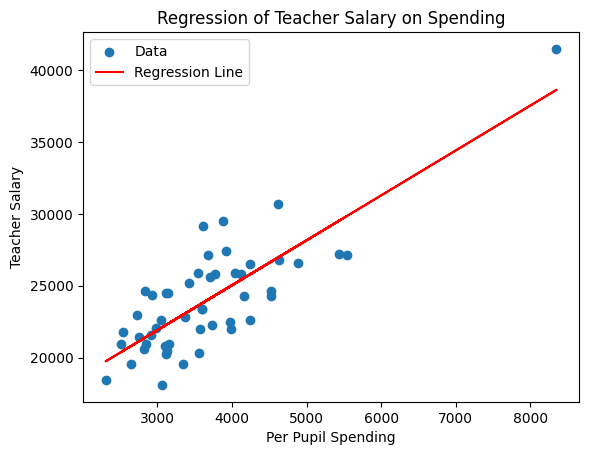

In [5]:
# 3. График регрессии
plt.scatter(df["Spending"], df["Salary"], label="Data")
plt.plot(df["Spending"], model.predict(X), color='red', label="Regression Line")
plt.xlabel("Per Pupil Spending")
plt.ylabel("Teacher Salary")
plt.title("Regression of Teacher Salary on Spending")
plt.legend()
plt.show()

In [6]:
# 4. Доверительный интервал для коэффициента b2
conf_int = model.conf_int(alpha=0.05)
print(f"95% Confidence Interval for β2: {conf_int.loc['Spending']}")

95% Confidence Interval for β2: 0    2.469832
1    3.784304
Name: Spending, dtype: float64


In [7]:
# 5. Проверка гипотезы β2 = 3.0
hypothesis_test = model.t_test("Spending = 3.0")
print(hypothesis_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.1271      0.327      0.389      0.699       2.470       3.784


In [10]:
# 6. Прогноз при spending = 5000
spending_value = 5000
new_X = pd.DataFrame({"const": [1], "Spending": [spending_value]})  # Добавляем 'const'
prediction = model.get_prediction(new_X)  
print(prediction.summary_frame(alpha=0.05))


           mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  28161.762188  542.674573    27070.64183   29252.882546  23450.571605   

   obs_ci_upper  
0   32872.95277  


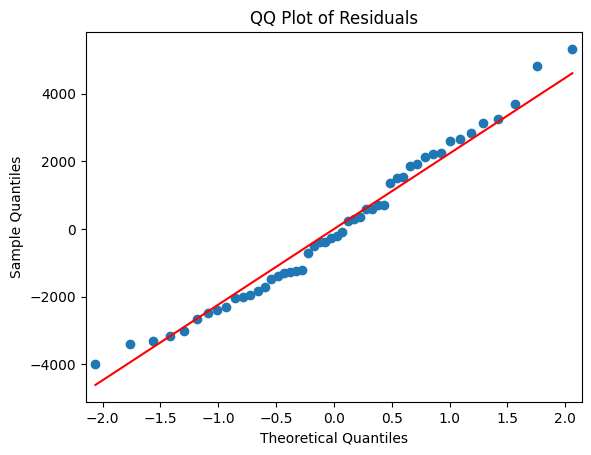

In [11]:
# 7. Проверка нормальности остатков
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

In [12]:

# 8. Тест Шапиро-Уилка на нормальность
from scipy.stats import shapiro
test_stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {test_stat}, p-value: {p_value}")
if p_value > 0.05:
    print("Residuals appear to be normally distributed.")
else:
    print("Residuals do not appear to be normally distributed.")


Shapiro-Wilk test statistic: 0.9757700781143588, p-value: 0.3903014280080546
Residuals appear to be normally distributed.


In [14]:
# Данные по GNP и денежным агрегатам
gnp_money_data = {
    "GNP": [992.7, 1077.6, 1185.9, 1326.4, 1434.2, 1549.2, 1718.3, 2163.9, 2417.8, 2637.7, 2957.8, 3069.8, 3304.8],
    "M1": [216.6, 230.8, 252.0, 265.9, 277.8, 291.2, 310.4, 363.1, 398.1, 441.9, 480.5, 480.5, 525.4],
    "M2": [628.2, 712.8, 805.2, 861.0, 908.5, 1023.3, 1163.6, 1389.1, 1498.5, 1632.6, 1796.6, 1965.4, 2196.3]
}
gnp_df = pd.DataFrame(gnp_money_data)


In [15]:
# Регрессия GNP на M1
X_gnp = sm.add_constant(gnp_df["M1"])
Y_gnp = gnp_df["GNP"]
gnp_model = sm.OLS(Y_gnp, X_gnp).fit()
print(gnp_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GNP   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3534.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           3.78e-15
Time:                        12:40:57   Log-Likelihood:                -67.515
No. Observations:                  13   AIC:                             139.0
Df Residuals:                      11   BIC:                             140.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -689.2461     46.906    -14.694      0.0

c:\Users\Gani\anaconda3\envs\conda-python\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
# Данные по кривой безразличия
consumption_data = {
    "X": [1, 2, 3, 4, 5],
    "Y": [4, 3.5, 2.8, 1.9, 0.8]
}

consumption_df = pd.DataFrame(consumption_data)

In [17]:
# Регрессия кривой безразличия
X_indiff = sm.add_constant(consumption_df["X"])
Y_indiff = consumption_df["Y"]
indiff_model = sm.OLS(Y_indiff, X_indiff).fit()
print(indiff_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):            0.00134
Time:                        12:41:12   Log-Likelihood:                 1.8442
No. Observations:                   5   AIC:                            0.3116
Df Residuals:                       3   BIC:                           -0.4695
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0000      0.227     22.068      0.0

c:\Users\Gani\anaconda3\envs\conda-python\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
